In [48]:
import numpy as np
from tqdm import tqdm_notebook
import torch
import zipfile
import os
import random
import torchvision.transforms as  transforms
from PIL import Image
import itertools
import cv2

ModuleNotFoundError: No module named 'cv2'

In [41]:
folder_dir = "C:\\Users\\-\\Downloads\\cars\\data1a\\training\\01-whole"
train_whole = []
size = (32, 32)
for images in os.listdir(folder_dir):
    sample = Image.open(folder_dir + '\\' + images)
    sample = sample.resize(size)
    trans=transforms.Compose([transforms.ToTensor()])
    a=trans(sample)
    a = torch.flatten(a)
    train_whole.append(a)

In [ ]:
folder_dir = "C:\\Users\\-\\Downloads\\cars\\data1a\\training\\01-whole"
train_whole = []
size = (32, 32)
for images in os.listdir(folder_dir):
    sample = Image.open(folder_dir + '\\' + images)
    sample = sample.resize(size)
    trans=transforms.Compose([transforms.ToTensor()])
    a=trans(sample)
    a = torch.flatten(a)
    train_whole.append(a)

In [4]:
folder_dir = "C:\\Users\\-\\Downloads\\cars\\data1a\\training\\00-damage"
train_damage = []
size = (32, 32)
for images in os.listdir(folder_dir):
    sample = Image.open(folder_dir + '\\' + images)
    sample = sample.resize(size)
    trans=transforms.Compose([transforms.ToTensor()])
    a=trans(sample)
    a = torch.flatten(a)
    train_damage.append(a)

In [5]:
folder_dir = "C:\\Users\\-\\Downloads\\cars\\data1a\\validation\\01-whole"
test_whole = []
size = (32, 32)
for images in os.listdir(folder_dir):
    sample = Image.open(folder_dir + '\\' + images)
    sample = sample.resize(size)
    trans=transforms.Compose([transforms.ToTensor()])
    a=trans(sample)
    a = torch.flatten(a)
    test_whole.append(a)

In [6]:
folder_dir = "C:\\Users\\-\\Downloads\\cars\\data1a\\validation\\00-damage"
test_damage = []
size = (32, 32)
for images in os.listdir(folder_dir):
    sample = Image.open(folder_dir + '\\' + images)
    sample = sample.resize(size)
    trans=transforms.Compose([transforms.ToTensor()])
    a=trans(sample)
    a = torch.flatten(a)
    test_damage.append(a)

In [6]:
# a = np.zeros(len(train_whole), dtype=int)
# b = np.ones(len(train_damage), dtype=int)
# y_train = np.concatenate([a, b])

# a = np.zeros(len(test_whole), dtype=int)
# b = np.ones(len(test_damage), dtype=int)
# y_test = np.concatenate([a, b])

# X_train = train_whole+train_damage
# X_train = torch.stack(X_train)
# X_test = test_whole+test_damage
# X_train

In [7]:
X_train = np.concatenate([train_whole, train_damage])
X_train = list(X_train)
X_train.pop(57)
X_train = tuple(X_train)

<__array_function__ internals>:5: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [8]:
a = np.zeros(len(train_whole), dtype=int)
b = np.ones(len(train_damage), dtype=int)
y_train = np.concatenate([a, b])
y_train = np.delete(y_train, 57, 0)

a = np.zeros(len(test_whole), dtype=int)
b = np.ones(len(test_damage), dtype=int)
y_test = np.concatenate([a, b])

#X_train = np.concatenate([train_whole, train_damage])
#np.asarray(tuple1)
X_train = tuple(X_train)
X_train = torch.stack(X_train)

#X_train = torch.concat(X_train)

X_test = np.concatenate([test_whole, test_damage])
X_test = tuple(X_test)
X_test = torch.stack(X_test)
#X_test = tuple(X_test)
#|X_test = torch.concat(X_test)

In [9]:
from sklearn.svm import SVC

clf = SVC(gamma="scale", random_state=0)

In [10]:
clf.fit(X_train, y_train)

SVC(random_state=0)

In [11]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,

In [12]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[157  73]
 [ 62 168]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       230
           1       0.70      0.73      0.71       230

    accuracy                           0.71       460
   macro avg       0.71      0.71      0.71       460
weighted avg       0.71      0.71      0.71       460



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt
import  numpy as np

In [14]:
def plot_learning_curve(x_train, x_test, y_train_, y_test, model, name):
  # Создайте конвейер; Это будет передано в качестве оценки в метод кривой обучения
  pipeline = make_pipeline(StandardScaler(), model)

  # Используйте кривую обучения, чтобы получить результаты тренировок и тестов, а также размеры поездов
  train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train, y=y_train,
  cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
  n_jobs=1)

  # Рассчитайте среднее значение обучения и тестирования и std
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Постройте кривую обучения
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title(f'Learning Curve of {name}')
  plt.xlabel('Training Data Size')
  plt.ylabel('Model accuracy')
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()

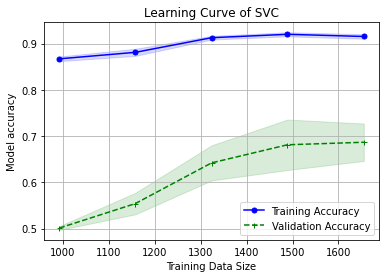

In [15]:
plot_learning_curve(X_train, X_test, y_train, y_test, clf, 'SVC')

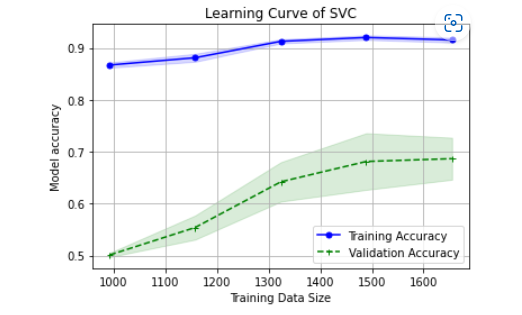

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
%%time

model2 = MLPClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred

import time
time.sleep(1)
time.sleep(0.2)

Wall time: 1min 29s


In [13]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[159  71]
 [ 59 171]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       230
           1       0.71      0.74      0.72       230

    accuracy                           0.72       460
   macro avg       0.72      0.72      0.72       460
weighted avg       0.72      0.72      0.72       460



In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
%%time

model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred
import time
time.sleep(1)
time.sleep(0.2)

Wall time: 6.96 s


In [16]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[134  96]
 [ 83 147]]
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       230
           1       0.60      0.64      0.62       230

    accuracy                           0.61       460
   macro avg       0.61      0.61      0.61       460
weighted avg       0.61      0.61      0.61       460



In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
%%time

cls = LogisticRegression()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
import time
time.sleep(1)
time.sleep(0.2)

cls

C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 31.6 s


LogisticRegression()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[154  76]
 [ 76 154]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       230
           1       0.67      0.67      0.67       230

    accuracy                           0.67       460
   macro avg       0.67      0.67      0.67       460
weighted avg       0.67      0.67      0.67       460



In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[151  79]
 [102 128]]
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       230
           1       0.62      0.56      0.59       230

    accuracy                           0.61       460
   macro avg       0.61      0.61      0.61       460
weighted avg       0.61      0.61      0.61       460



In [13]:
def test(url):
    folder_dir = url
    test_damage1 = []
    size = (32, 32)
    for images in os.listdir(folder_dir):
        sample1 = Image.open(folder_dir + '\\' + images)
        sample1 = sample1.resize(size)
        trans1=transforms.Compose([transforms.ToTensor()])
        a1=trans1(sample1)
        a1 = torch.flatten(a1)
        test_damage1.append(a1)

    X_test1 = tuple(test_damage1)
    X_test1 = torch.stack(X_test1)

    y_pred1 = clf.predict(X_test1)
    #y_pred2 = model1.predict(X_test1)
    #y_pred3 = cls.predict(X_test1)
    #y_pred4 = classifier.predict(X_test1)
    return y_pred1#, y_pred2, y_pred3, y_pred4 
    


In [14]:
test('C:\\Users\\-\\Downloads\\Учёба\\Проекты\\Cars_test')

array([0, 1, 1, 0, 0, 1, 1])

In [15]:
X_train = X_train / 255
X_test = X_test / 255
len(X_train[0])

3072

In [16]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import tensorflow as tf

In [17]:
model = keras.Sequential([
                        keras.Input(shape=(3072,)),
                        keras.layers.Dense(128, activation='relu'),
                        keras.layers.Dense(10, activation='softmax')                  
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [20]:
np_tensor1 = X_train.numpy()
X_train = tf.convert_to_tensor(np_tensor1)
np_tensor2 = X_test.numpy()
X_test = tf.convert_to_tensor(np_tensor2)

In [26]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7413 - accuracy: 0.4921
Epoch 2/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7346 - accuracy: 0.4937
Epoch 3/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7297 - accuracy: 0.4883
Epoch 4/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.4905
Epoch 5/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7224 - accuracy: 0.4785
Epoch 6/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.4954
Epoch 7/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.4899
Epoch 8/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7151 - accuracy: 0.4731
Epoch 9/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.4774
Epoch 10/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.4823


In [27]:
predictions = model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [28]:
predictions[0]

array([0.48795173, 0.494519  , 0.00220263, 0.00181506, 0.00187866,
       0.00244804, 0.00240274, 0.00183142, 0.00204128, 0.00290938],
      dtype=float32)

In [29]:
pred = []
for i in predictions:
    pred.append(i[:2])
pred_tr = []
for j in pred:
    if j[0]>j[1]:
        pred_tr.append(1)
    else:
        pred_tr.append(0)
pred_tr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [30]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,pred_tr)) 
print(classification_report(y_test,pred_tr))

[[230   0]
 [230   0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       230
           1       0.00      0.00      0.00       230

    accuracy                           0.50       460
   macro avg       0.25      0.50      0.33       460
weighted avg       0.25      0.50      0.33       460



C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn import metrics

In [32]:
metrics.accuracy_score(y_test, pred_tr)

0.5

In [36]:
metrics.precision_score(y_test, pred_tr)

TypeError: precision_score() got an unexpected keyword argument 'macro'

In [ ]:
metrics.recall_score(y_test, pred_tr)